In [55]:
# Plain Nonfat Yogurt Classification using Random Forest + TF-IDF Approach
# Import necessary libraries
import pandas
import numpy
import json
import re
import requests
import sklearn.feature_extraction.text
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics
import matplotlib.pyplot
import seaborn

# Load data directly from GitHub
url = "https://raw.githubusercontent.com/gkwa/smallsheep/master/plain_yogurt.json"
response = requests.get(url)
data = response.json()

# Set display options to show full column names and more rows
pandas.set_option('display.max_columns', None)  # Show all columns
pandas.set_option('display.width', 1000)        # Wider display
pandas.set_option('display.max_colwidth', None) # Show full column content
pandas.set_option('display.max_rows', 100)      # Show n rows

# Create DataFrame
df = pandas.DataFrame(data)

# Remove the confidence field since it's not relevant
if 'confidence' in df.columns:
    df = df.drop(columns=['confidence'])

# Display the column names to understand the structure
print("Column names in the dataset:")
print(df.columns.tolist())



Column names in the dataset:
['product_title', 'is_plain_yogurt', 'is_nonfat']


In [56]:
# Create new target column for "plain nonfat yogurt"
# A product is plain nonfat yogurt if both is_plain_yogurt and is_nonfat are True
df['is_plain_nonfat_yogurt'] = (df['is_plain_yogurt'] & df['is_nonfat'])

# Print sample data to verify our processing
print("\nExample data with new target column:")
print(df.head(10))


Example data with new target column:
                                                                 product_title  is_plain_yogurt  is_nonfat  is_plain_nonfat_yogurt
0                                                                 Plain Bagels            False      False                   False
1                                                                 Plain Bagels            False      False                   False
2                        siggi's Vanilla Icelandic-Style Nonfat Yogurt, 5.3 oz            False       True                   False
3                                Zoi Honey Vanilla Whole Milk Greek Yogurt Tub            False      False                   False
4  Yoplait Original Smooth Style Strawberry Flavored Low Fat Yogurt Tub, 32 oz            False      False                   False
5  Yoplait Original Low Fat Lemon Burst Yogurt Cup, Made with Real Fruit, 6 oz            False      False                   False
6                     Yoplait Original Low Fa

In [57]:
# Display examples of plain nonfat yogurt (True) and non-plain nonfat yogurt (False)
print("\nExample plain nonfat yogurt (is_plain_nonfat_yogurt = True):")
print(df[df['is_plain_nonfat_yogurt'] == True].head(30))


Example plain nonfat yogurt (is_plain_nonfat_yogurt = True):
                                                                                                          product_title  is_plain_yogurt  is_nonfat  is_plain_nonfat_yogurt
26                                                                 siggi's® Icelandic Skyr Nonfat Yogurt, Plain, 5.3 oz             True       True                    True
27                                                                 siggi's® Icelandic Skyr Nonfat Yogurt, Plain, 24 oz.             True       True                    True
28   siggi's® Icelandic Strained Nonfat Yogurt, Plain, 24 oz. Multiserving Container – Thick, Protein-Rich Yogurt Snack             True       True                    True
29                                                                   siggi's Plain Icelandic Skyr Nonfat Yogurt - 24 Oz             True       True                    True
30         siggi's Icelandic Strained Nonfat Yogurt, Plain, 5.3 oz. Single Ser

In [58]:
print("\nExample non-plain nonfat yogurt (is_plain_nonfat_yogurt = False):")
print(df[df['is_plain_nonfat_yogurt'] == False].head(30))




Example non-plain nonfat yogurt (is_plain_nonfat_yogurt = False):
                                                                  product_title  is_plain_yogurt  is_nonfat  is_plain_nonfat_yogurt
0                                                                  Plain Bagels            False      False                   False
1                                                                  Plain Bagels            False      False                   False
2                         siggi's Vanilla Icelandic-Style Nonfat Yogurt, 5.3 oz            False       True                   False
3                                 Zoi Honey Vanilla Whole Milk Greek Yogurt Tub            False      False                   False
4   Yoplait Original Smooth Style Strawberry Flavored Low Fat Yogurt Tub, 32 oz            False      False                   False
5   Yoplait Original Low Fat Lemon Burst Yogurt Cup, Made with Real Fruit, 6 oz            False      False                   False
6        

In [59]:
# Create a statistics table
stats_data = {
    'Metric': ['Total products', 'Plain yogurt', 'Nonfat products', 'Plain nonfat yogurt'],
    'Count': [
        len(df),
        df['is_plain_yogurt'].sum(),
        df['is_nonfat'].sum(),
        df['is_plain_nonfat_yogurt'].sum()
    ]
}

# Create DataFrame for the statistics
stats_df = pandas.DataFrame(stats_data)

# Display the statistics table
print("\nDataset Statistics:")
print(stats_df)




Dataset Statistics:
                Metric  Count
0       Total products    314
1         Plain yogurt    249
2      Nonfat products     95
3  Plain nonfat yogurt     84


In [60]:
# Feature extraction using TF-IDF on the product title
# Initialize TF-IDF vectorizer
tfidf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(
    min_df=2,
    max_df=0.9,
    ngram_range=(1, 2),
    stop_words='english'
)

# Fit and transform the product titles
X_tfidf = tfidf_vectorizer.fit_transform(df['product_title'])

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\nNumber of features extracted: {len(feature_names)}")
print(f"Sample features: {', '.join(feature_names[:10])}")

# Prepare the target variable
y = df['is_plain_nonfat_yogurt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X_tfidf,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Print dataset sizes using shape attribute instead of len()
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")




Number of features extracted: 542
Sample features: 02, 02 yogurt, 10, 10 pack, 100, 100 grass, 12, 12 case, 16, 16 oz

Training set size: 219
Testing set size: 95



Accuracy: 0.9053

Classification Report:
              precision    recall  f1-score   support

       False       0.89      1.00      0.94        70
        True       1.00      0.64      0.78        25

    accuracy                           0.91        95
   macro avg       0.94      0.82      0.86        95
weighted avg       0.92      0.91      0.90        95


Confusion Matrix:
[[70  0]
 [ 9 16]]


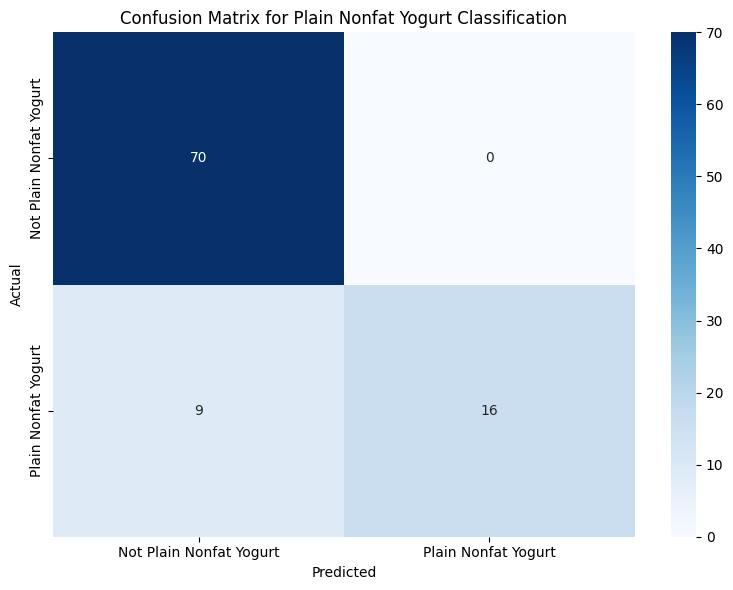

In [61]:
# Initialize and train the Random Forest classifier
rf_classifier = sklearn.ensemble.RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
classification_report_str = sklearn.metrics.classification_report(y_test, y_pred)
conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report_str)

# Display confusion matrix as text
print("\nConfusion Matrix:")
print(conf_matrix)

# Display confusion matrix as heatmap
plt_figure = matplotlib.pyplot.figure(figsize=(8, 6))
seaborn.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Plain Nonfat Yogurt', 'Plain Nonfat Yogurt'],
    yticklabels=['Not Plain Nonfat Yogurt', 'Plain Nonfat Yogurt']
)
matplotlib.pyplot.xlabel('Predicted')
matplotlib.pyplot.ylabel('Actual')
matplotlib.pyplot.title('Confusion Matrix for Plain Nonfat Yogurt Classification')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()



In [62]:
# Get feature importance
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for the top N features
n_top_features = 15
indices = numpy.argsort(feature_importances)[-n_top_features:]
top_features_df = pandas.DataFrame({
    'Feature': [feature_names[i] for i in indices],
    'Importance': feature_importances[indices]
}).sort_values('Importance', ascending=False)



In [63]:
# Display top features
print(f"\nTop {n_top_features} Features:")
print(top_features_df)


Top 15 Features:
          Feature  Importance
14         nonfat    0.119222
13   plain nonfat    0.064683
12        non fat    0.047966
11            non    0.046562
10        chobani    0.040022
9             fat    0.039764
8   nonfat yogurt    0.039628
7    greek yogurt    0.038527
6    nonfat plain    0.033356
5       fat plain    0.028843
4           plain    0.025748
3    nonfat greek    0.023334
2     plain greek    0.023291
1            milk    0.019068
0           greek    0.019034


In [64]:
# Get probability predictions
y_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probability of being plain nonfat yogurt

# Try different thresholds to maximize recall
thresholds = numpy.arange(0.05, 0.95, 0.05)
best_threshold = 0.5  # Start with default
best_recall = sklearn.metrics.recall_score(y_test, y_pred)
results = []

# Test each threshold
for threshold in thresholds:
    y_pred_threshold = (y_proba >= threshold).astype(int)
    recall = sklearn.metrics.recall_score(y_test, y_pred_threshold)
    precision = sklearn.metrics.precision_score(y_test, y_pred_threshold, zero_division=0)
    f1 = sklearn.metrics.f1_score(y_test, y_pred_threshold, zero_division=0)
    results.append({
        'threshold': threshold,
        'recall': recall,
        'precision': precision,
        'f1': f1
    })
    # Update best threshold if recall improves
    if recall > best_recall:
        best_recall = recall
        best_threshold = threshold

# Apply the optimal threshold
y_pred_optimized = (y_proba >= best_threshold).astype(int)
opt_conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred_optimized)

# Compare results
print(f"\nOptimal threshold for maximizing recall: {best_threshold}")
print(f"Original recall: {sklearn.metrics.recall_score(y_test, y_pred)}")
print(f"Optimized recall: {best_recall}")
print(f"Original false negatives: {conf_matrix[1, 0]}")
print(f"Optimized false negatives: {opt_conf_matrix[1, 0]}")




Optimal threshold for maximizing recall: 0.05
Original recall: 0.64
Optimized recall: 1.0
Original false negatives: 9
Optimized false negatives: 0


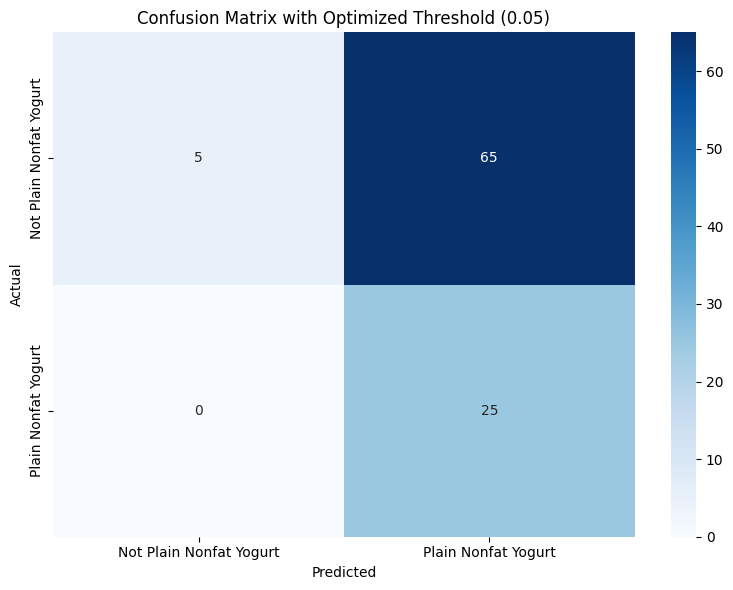


Thresholds with recall ≥ original recall:
    threshold  recall  precision        f1  false_positives  false_negatives
44       0.49    0.64   1.000000  0.780488                0                9
43       0.48    0.64   0.888889  0.744186                2                9
42       0.47    0.64   0.888889  0.744186                2                9
40       0.45    0.64   0.888889  0.744186                2                9
39       0.44    0.64   0.888889  0.744186                2                9
37       0.42    0.68   0.894737  0.772727                2                8
38       0.43    0.68   0.894737  0.772727                2                8
41       0.46    0.64   0.888889  0.744186                2                9
34       0.39    0.76   0.863636  0.808511                3                6
36       0.41    0.68   0.850000  0.755556                3                8
35       0.40    0.72   0.857143  0.782609                3                7
31       0.36    0.80   0.800000 

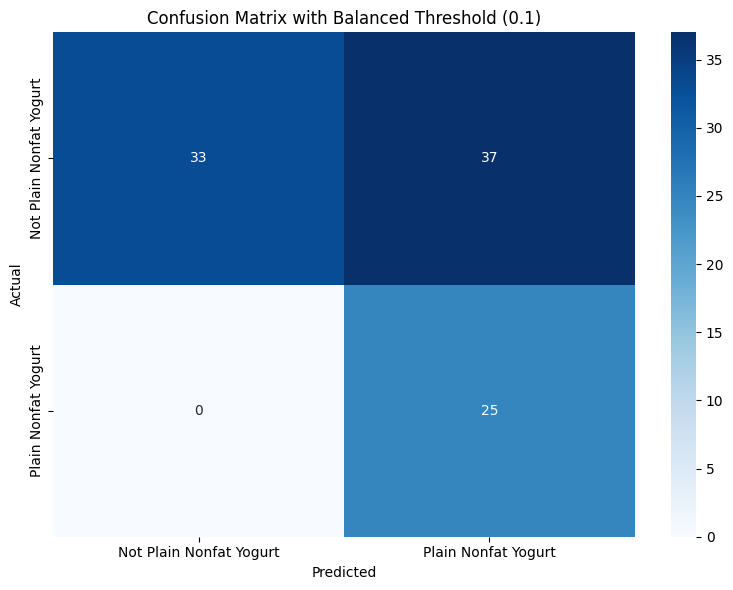

In [65]:
# Show the optimized confusion matrix
plt_figure = matplotlib.pyplot.figure(figsize=(8, 6))
seaborn.heatmap(
    opt_conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Plain Nonfat Yogurt', 'Plain Nonfat Yogurt'],
    yticklabels=['Not Plain Nonfat Yogurt', 'Plain Nonfat Yogurt']
)
matplotlib.pyplot.xlabel('Predicted')
matplotlib.pyplot.ylabel('Actual')
matplotlib.pyplot.title(f'Confusion Matrix with Optimized Threshold ({best_threshold})')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# Explore thresholds that balance recall and precision better
# Look for thresholds with improved recall (at least as good as default)
good_thresholds = []
for threshold in numpy.arange(0.05, 0.5, 0.01):  # Finer granularity
    y_pred_threshold = (y_proba >= threshold).astype(int)
    recall = sklearn.metrics.recall_score(y_test, y_pred_threshold)
    precision = sklearn.metrics.precision_score(y_test, y_pred_threshold, zero_division=0)
    f1 = sklearn.metrics.f1_score(y_test, y_pred_threshold, zero_division=0)
    fp = sklearn.metrics.confusion_matrix(y_test, y_pred_threshold)[0, 1]  # False positives
    fn = sklearn.metrics.confusion_matrix(y_test, y_pred_threshold)[1, 0]  # False negatives

    if recall >= sklearn.metrics.recall_score(y_test, y_pred):  # At least as good as original recall
        good_thresholds.append({
            'threshold': threshold,
            'recall': recall,
            'precision': precision,
            'f1': f1,
            'false_positives': fp,
            'false_negatives': fn
        })

# Convert to DataFrame and display
balance_df = pandas.DataFrame(good_thresholds)
if not balance_df.empty:
    print("\nThresholds with recall ≥ original recall:")
    print(balance_df.sort_values('false_positives'))

    # Find a better balanced threshold - one with highest recall but fewer false positives
    # Get thresholds with the highest recall
    max_recall = balance_df['recall'].max()
    high_recall_df = balance_df[balance_df['recall'] == max_recall]

    if not high_recall_df.empty:
        # From those with highest recall, get the one with fewest false positives
        balanced_threshold = high_recall_df.loc[high_recall_df['false_positives'].idxmin(), 'threshold']
    else:
        # Otherwise get the threshold with the best F1 score
        balanced_threshold = balance_df.loc[balance_df['f1'].idxmax(), 'threshold']

    # Apply the balanced threshold
    y_pred_balanced = (y_proba >= balanced_threshold).astype(int)
    balanced_conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred_balanced)

    print(f"\nBetter balanced threshold: {balanced_threshold}")
    print(f"Recall: {sklearn.metrics.recall_score(y_test, y_pred_balanced)}")
    print(f"Precision: {sklearn.metrics.precision_score(y_test, y_pred_balanced)}")
    print(f"F1 Score: {sklearn.metrics.f1_score(y_test, y_pred_balanced)}")
    print(f"False negatives: {balanced_conf_matrix[1, 0]}")
    print(f"False positives: {balanced_conf_matrix[0, 1]}")

    # Show the balanced confusion matrix
    plt_figure = matplotlib.pyplot.figure(figsize=(8, 6))
    seaborn.heatmap(
        balanced_conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Not Plain Nonfat Yogurt', 'Plain Nonfat Yogurt'],
        yticklabels=['Not Plain Nonfat Yogurt', 'Plain Nonfat Yogurt']
    )
    matplotlib.pyplot.xlabel('Predicted')
    matplotlib.pyplot.ylabel('Actual')
    matplotlib.pyplot.title(f'Confusion Matrix with Balanced Threshold ({balanced_threshold})')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()
else:
    print("\nNo thresholds found with recall better than or equal to original.")